# Batch Classify Images

This script predicts labels from new images and stores results. 

In [1]:
# cd /media/ssd/crop_image_classifier/Scripts
#source activate tensorflow
#jupyter notebook

# run from python
import sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from datetime import datetime
import os
from PIL import Image, ImageDraw, ImageFont
import time
import psutil
import pandas as pd
import os, glob
from scripts.load_graph import load_graph
from scripts.read_tensor_from_image_file import read_tensor_from_image_file
from scripts.load_labels import load_labels
from scripts.show_images import show_images
import label_image

################################


input_height = 299
input_width = 299
input_mean = 0
input_std = 255
input_layer = "Placeholder"
output_layer = "final_result"
label_file = r'/media/ssd/Lodging_Classifier/Models/tf_files/retrained_labels.txt'
model_file = r'/media/ssd/Lodging_Classifier/Models/tf_files/retrained_graph.pb'
    
###############################
# iterate across series of photos 

# set up storage for classifications
df = pd.DataFrame(columns=['Path' ,'Class','Prob'])
row = 0

os.chdir(r'/media/ssd/crop_image_classifier/Data/TestingImages_AOI/')
rootdir = os.getcwd()

for dir, dirs, files in os.walk(rootdir):
    for file in files:
        file_name = os.path.join(dir, file)
        #print(file_name)
        graph = load_graph(model_file)
        t = read_tensor_from_image_file(file_name,input_height=input_height,input_width=input_width,input_mean=input_mean,input_std=input_std)
        input_name = "import/" + input_layer
        output_name = "import/" + output_layer
        input_operation = graph.get_operation_by_name(input_name)
        output_operation = graph.get_operation_by_name(output_name)
        with tf.Session(graph=graph) as sess:
            results = sess.run(output_operation.outputs[0],
                  {input_operation.outputs[0]: t})
        results = np.squeeze(results)
        top_k = results.argsort()[-5:][::-1]
        labels = load_labels(label_file)
        image = Image.open( file_name)
        font_type = ImageFont.truetype('/home/mmann1123/Documents/Fonts/unifont-10.0.07.ttf',35)
        draw = ImageDraw.Draw(image)
        draw.text(xy =(50,30),text=labels[top_k[0]]+' '+str(round(results[top_k[0]],3)),fill=(255,255,255), font=font_type)
        draw.text(xy =(50,60),text=labels[top_k[1]]+' '+str(round(results[top_k[1]],3)),fill=(255,255,255), font=font_type)
        #image.show()
        image.save(os.path.join(r'/media/ssd/crop_image_classifier/Data/TestingImages_Labels', file))
        
        file_name2 = os.path.splitext(file_name)[0]
        df.loc[row] = [file_name,labels[top_k[0]],results[top_k[0]] ]
        row += 1
        print(labels[top_k[0]], results[top_k[0]])
 

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

('false', 0.96005553)
('true', 0.95906472)
('false', 0.99018306)
('true', 0.94103783)
('true', 0.99754131)
('false', 0.8259449)
('true', 0.5545432)
('true', 0.99852872)
('true', 0.98008245)
('true', 0.88669759)


## Store image paths and labels 

In [10]:
df.head()

Path  Class      Prob
0  /media/ssd/crop_image_classifier/Data/TestingI...  false  0.960056
1  /media/ssd/crop_image_classifier/Data/TestingI...   true  0.959065
2  /media/ssd/crop_image_classifier/Data/TestingI...  false  0.990183
3  /media/ssd/crop_image_classifier/Data/TestingI...   true  0.941038
4  /media/ssd/crop_image_classifier/Data/TestingI...   true  0.997541

## Show images with labels

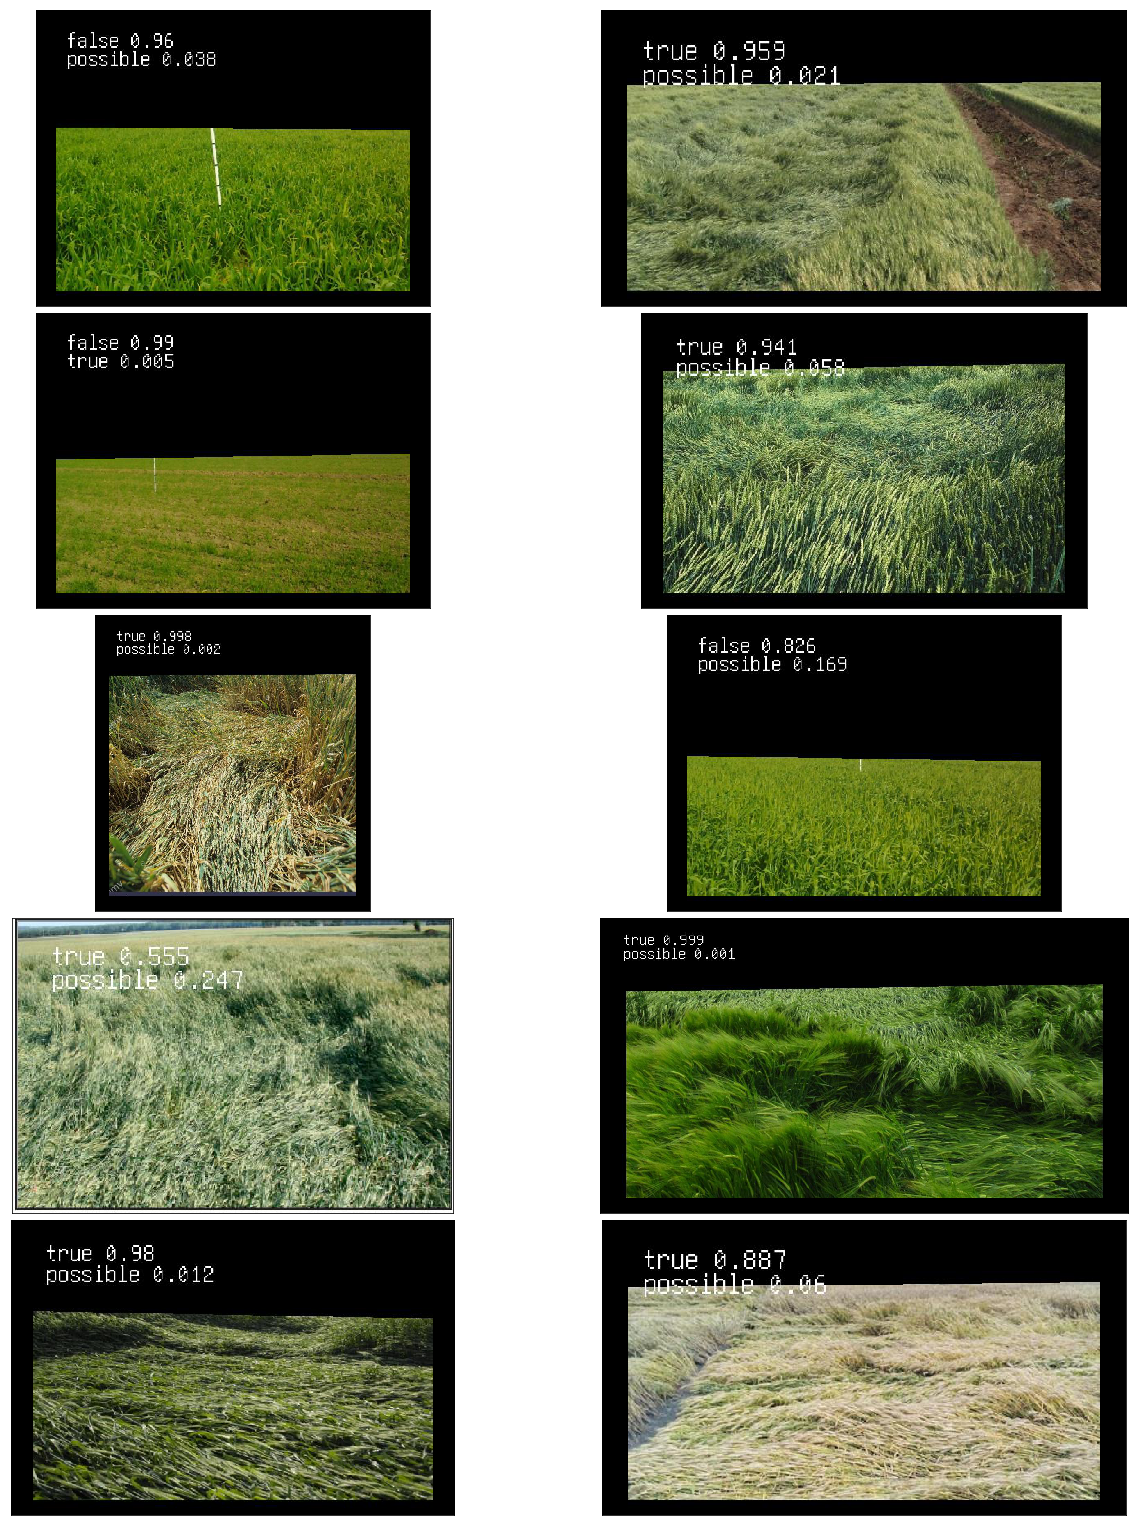

In [7]:
os.chdir(r'/media/ssd/crop_image_classifier/')

test_images = [plt.imread(path) for path in glob.glob('./Data/TestingImages_Labels/*.jpg')]

show_images(test_images)

## Images labeled "Yes" for lodging

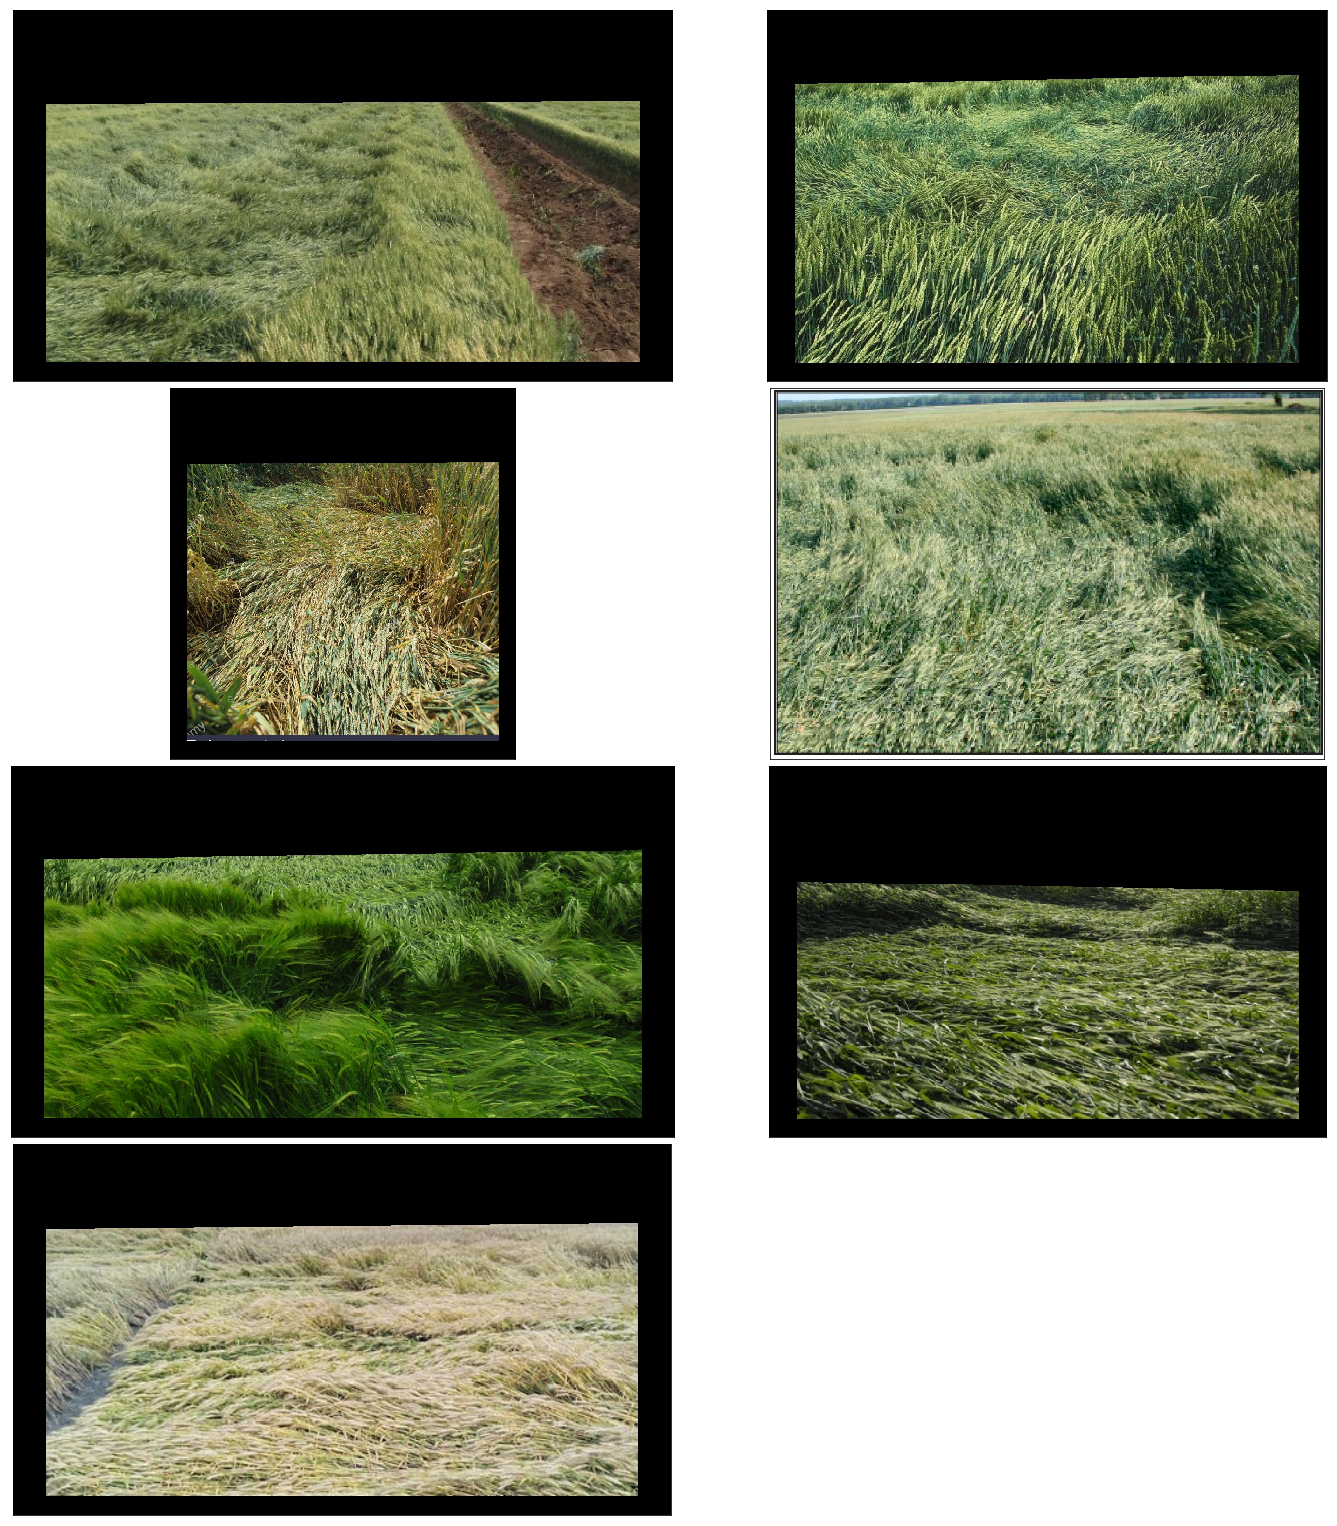

In [8]:
test_images = [plt.imread(path) for path in  df['Path'].loc[df['Class'] == 'true'].tolist()]

show_images(test_images)

## Images labeled "Possible" for lodging

In [9]:
test_images = [plt.imread(path) for path in  df['Path'].loc[df['Class'] == 'possible'].tolist()]

show_images(test_images)

'No images available'

## Images labeled "No" for lodging

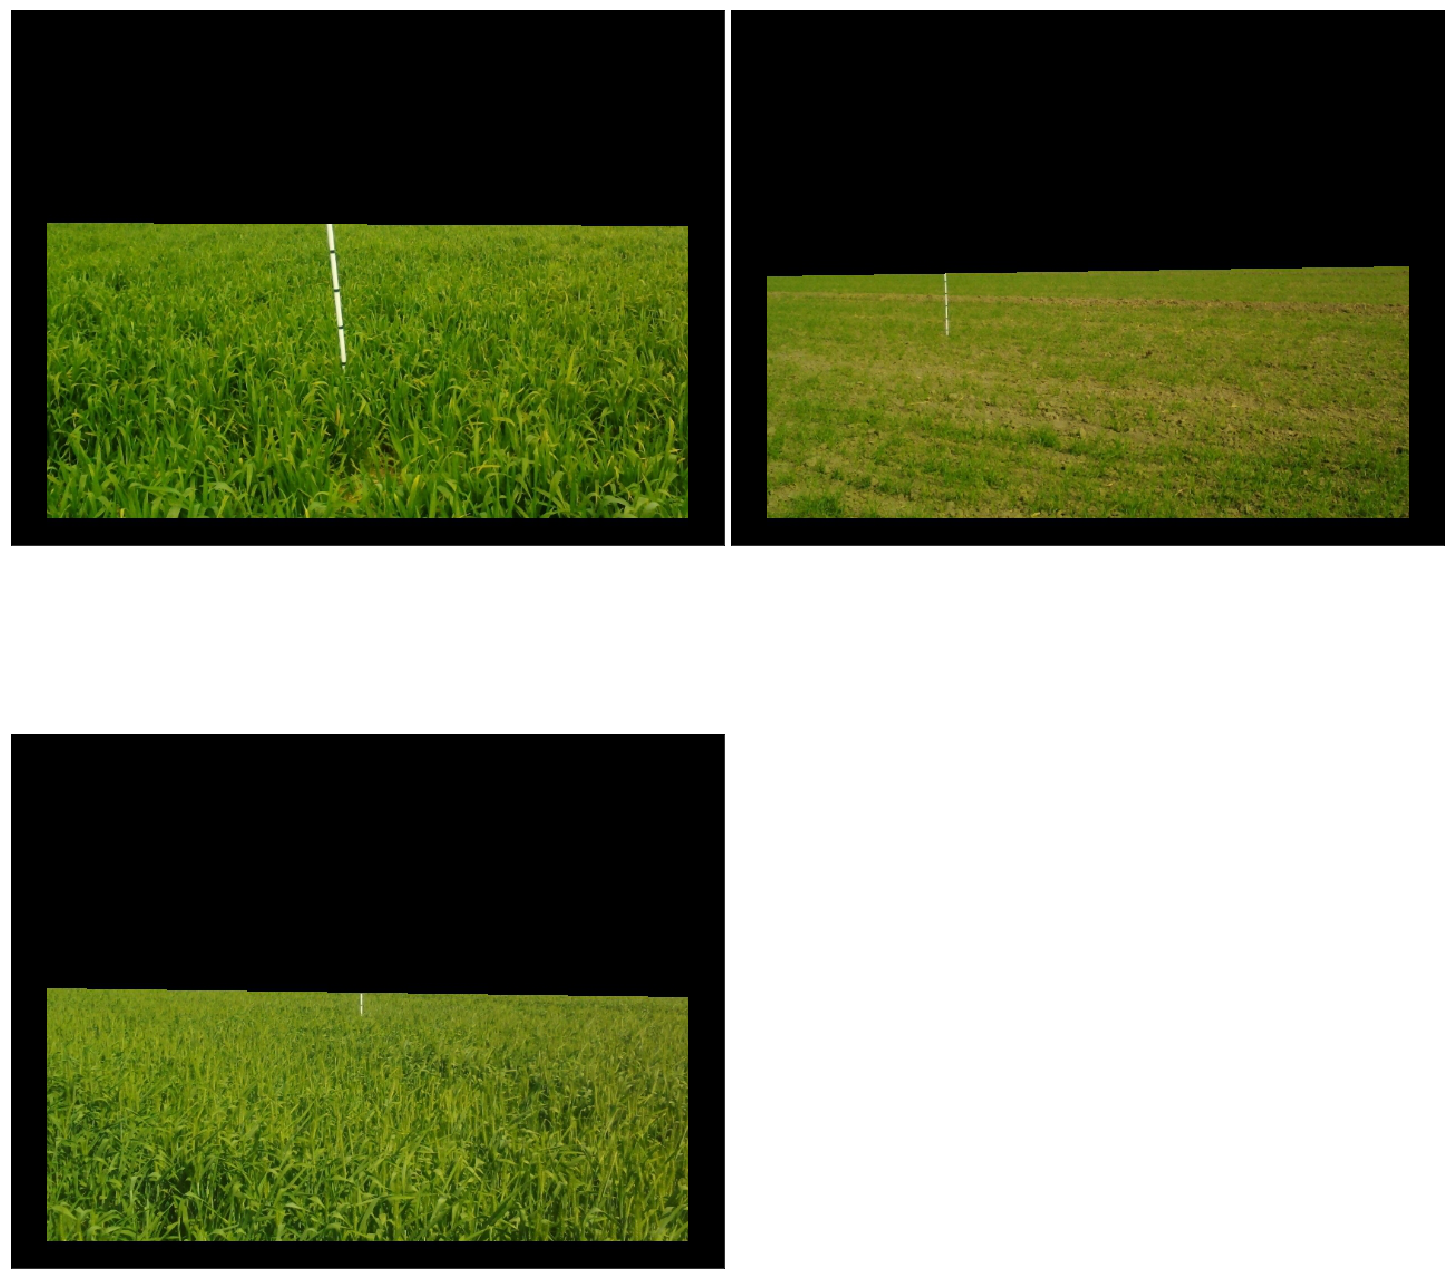

In [10]:
test_images = [plt.imread(path) for path in  df['Path'].loc[df['Class'] == 'false'].tolist()]

show_images(test_images)

Looking pretty good. 